# Introdução
Agente Inteligente desenvolvido para realizar a implementação do Hill Climbing Estocástico para Solucionar o problema do mais curto caminho, dado uma sequência procedural de pontos e distâncias. 

Aluno: Thiago Waib Castello Branco, RA:632856

In [1]:
# Realiza a importação de algumas bibliotecas importantes
import random
import math
import matplotlib.pyplot as plt

## Implementação do Algorítmo

In [2]:
# Gera uma matriz de pontos e distâncias, proceduralmente, dado uma quantidade de pontos inicial
def gerar_pontos_distancias(num_pontos):
    pontos = [(random.uniform(0, 1000), random.uniform(0, 1000)) for _ in range(num_pontos)]
    matriz_distancias = [
        [
            math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
            for p2 in pontos
        ]
        for p1 in pontos
    ]
    return pontos, matriz_distancias

In [3]:
# Calcula o custo (distância) total de uma matriz de distâncias dada
def calcula_custo(rota, matriz_distancias):
    custo_total = sum(
        matriz_distancias[rota[i]][rota[i + 1]] for i in range(len(rota) - 1)
    )
    return custo_total

In [ ]:
# Realiza a Mutação para o Algoritmo de Hill Climbing Estocástico
def mutar_rota(rota):
    nova_rota = rota[:]
    i, j = random.sample(range(len(rota)), 2)               # Seleciona dois índices aleatórios
    nova_rota[i], nova_rota[j] = nova_rota[j], nova_rota[i] # Troca os dois elementos de ordem
    return nova_rota

In [5]:
# Busca por Hill Climbing Estocástico
# Recebe a matriz de pontos e distâncias
# E recursivamente, através de N iterações
# Calcula uma mutação que seja beneficial a redução do custo total do percurso
# (ou uma solução pior, que provavelmente vá levar a uma melhoria futura)
def hill_climbing_estocastico(pontos, matriz_distancias, iteracoes=1000, prob_inicial=0.2):
    melhor_rota = list(range(len(pontos)))
    random.shuffle(melhor_rota)
    melhor_custo = calcula_custo(melhor_rota, matriz_distancias)

    historico_custos = [melhor_custo]
    prob_atual = prob_inicial

    for t in range(iteracoes):
        nova_rota = mutar_rota(melhor_rota)
        novo_custo = calcula_custo(nova_rota, matriz_distancias)

        # Reduz a probabilidade de aceitar piores conforme as iterações avançam
        if novo_custo < melhor_custo or random.random() < prob_atual:
            melhor_rota = nova_rota
            melhor_custo = novo_custo

        historico_custos.append(melhor_custo)
        prob_atual = prob_inicial * math.exp(-t / (iteracoes / 10))

    return melhor_rota, melhor_custo, historico_custos

## Funções de Plot / Demonstração

In [6]:
# Plota o gráfico de pontos
def plotar_pontos(pontos):
    if(len(pontos)>750):
        plt.figure(figsize=(30,30))
    elif(len(pontos)>250):
        plt.figure(figsize=(15,15))
    else:
        plt.figure()
    for i, ponto in enumerate(pontos):
        plt.scatter(ponto[0], ponto[1], color="blue", s=100, zorder=2)
        plt.text(ponto[0] + 15, ponto[1] + 15, f"P{i}", fontsize=10, zorder=3)
    plt.title("Pontos em Escala", fontsize=14)
    plt.xlabel("X (metros)", fontsize=12)
    plt.ylabel("Y (metros)", fontsize=12)
    plt.grid(True)
    plt.show()

In [7]:
# Plotar o caminho ótimo encontrado (GRAFO)
def plotar_caminho(pontos, rota):
    if(len(pontos)>750):
        plt.figure(figsize=(30,30))
    elif(len(pontos)>250):
        plt.figure(figsize=(15,15))
    else:
        plt.figure()
    for i, ponto in enumerate(pontos):
        plt.scatter(ponto[0], ponto[1], color="blue", s=100, zorder=2)
        plt.text(ponto[0] + 15, ponto[1] + 15, f"P{i}", fontsize=10, zorder=3)

    for i in range(len(rota) - 1):
        ponto_inicio = pontos[rota[i]]
        ponto_fim = pontos[rota[i + 1]]
        plt.plot(
            [ponto_inicio[0], ponto_fim[0]], 
            [ponto_inicio[1], ponto_fim[1]], 
            color="red", linewidth=2, zorder=1
        )
    plt.title("Caminho Ótimo Encontrado para TSP", fontsize=14)
    plt.xlabel("X (metros)", fontsize=12)
    plt.ylabel("Y (metros)", fontsize=12)
    plt.grid(True)
    plt.show()

In [8]:
# Printa a matriz da melhor rota em formato de linha.
def printar_melhor_rota(rota):
    print("Melhor Rota:")
    print(f"{' -> '.join(f'P{ponto}' for ponto in rota)}")

## Demonstração

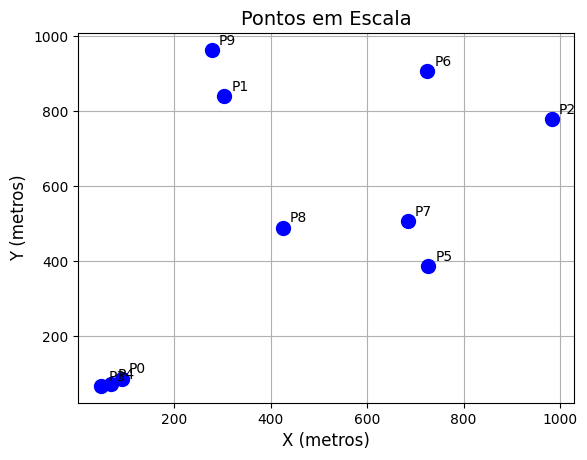

In [18]:
# Configurações do problema
num_pontos = 10
iteracoes = 10

# Gera os pontos e matriz de distâncias
pontos, matriz_distancias = gerar_pontos_distancias(num_pontos)
plotar_pontos(pontos)

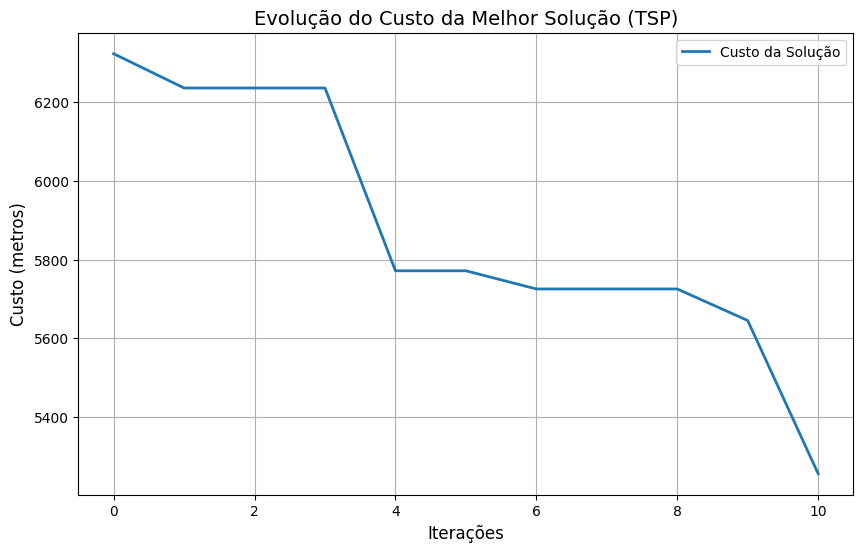

In [19]:
# Executa o algoritmo
melhor_rota, melhor_custo, historico_custos = hill_climbing_estocastico(
    pontos, matriz_distancias, iteracoes
)
# Gráfico da evolução do custo
plt.figure(figsize=(10, 6))
plt.plot(historico_custos, label="Custo da Solução", linewidth=2)
plt.xlabel("Iterações", fontsize=12)
plt.ylabel("Custo (metros)", fontsize=12)
plt.title("Evolução do Custo da Melhor Solução (TSP)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

O melhor caminho tem 5.255664025959591 Km.
Melhor Rota:
P3 -> P8 -> P0 -> P5 -> P2 -> P4 -> P7 -> P1 -> P9 -> P6


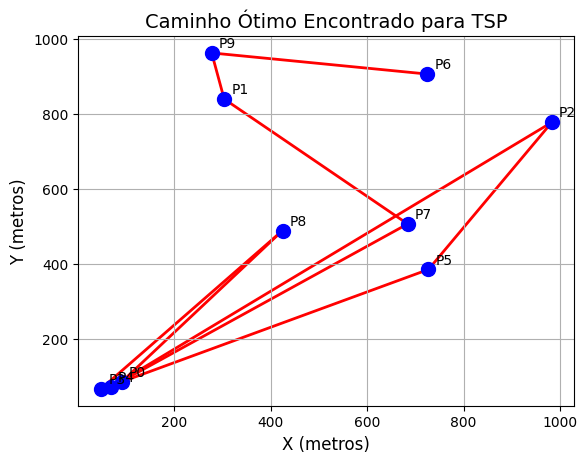

In [20]:
print("O melhor caminho tem", melhor_custo/1000, "Km.")
printar_melhor_rota(melhor_rota)

# Plotar o caminho ótimo
plotar_caminho(pontos, melhor_rota)
